**Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний"**

Выбранный датасет содержит 600 000 записей в обучающем наборе и 400 000 в тестовом. Каждая запись содержит id пациента и 13 признаков:
- Age (возраст);
- Sex (пол);
- Resting_blood_pressure (артериальное давление в состоянии покоя);
- Serum_cholestoral (уровень холестерина в крови mg/dl);
- Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
- Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
- Exercise_induced_angina (стенокардия при нагрузке),
- Oldpeak (депрессия ST-сегмента);
- Slope (наклон пикового сегмента ST при физической нагрузке);
- Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
- Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
- Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
- Chest (боль в груди от 1 до 4).

Цель проекта:

1. Провести предобработку данных.
2. Провести корреляционный анализ.
3. Обучить следующие модели и сравнить результаты:
    - Logistic Regression;
    - Randomforest;
    - Neural Network.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import joblib  # Для сохранения моделей
import warnings

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [5]:
test.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,600000.0,299999.500000,173205.225094,0.000000,149999.750000,299999.500000,449999.250000,599999.000000
age,600000.0,54.426085,9.086041,26.061695,48.078493,55.133425,60.663775,79.591647
sex,600000.0,0.677447,0.467454,0.000000,0.000000,1.000000,1.000000,1.000000
chest,600000.0,3.170247,0.949618,-0.538498,3.000000,3.000000,4.000000,4.000000
resting_blood_pressure,600000.0,131.340485,17.842450,82.918527,119.924094,129.727941,139.915216,209.673650
serum_cholestoral,600000.0,249.592420,51.699976,98.326263,216.475964,244.233699,274.345453,527.755764
fasting_blood_sugar,600000.0,0.150757,0.357812,0.000000,0.000000,0.000000,0.000000,1.000000
resting_electrocardiographic_results,600000.0,1.020148,0.994204,0.000000,0.000000,2.000000,2.000000,2.000000
maximum_heart_rate_achieved,600000.0,149.592069,23.072593,61.844168,135.704237,153.224828,165.165497,208.735196
exercise_induced_angina,600000.0,0.333502,0.471464,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
print("Уникальнные значения в тренировочных данных:\n", train.nunique())

Уникальнные значения в тренировочных данных:
 ID                                      600000
age                                     594106
sex                                          2
chest                                   133009
resting_blood_pressure                  596241
serum_cholestoral                       598797
fasting_blood_sugar                          2
resting_electrocardiographic_results         3
maximum_heart_rate_achieved             597583
exercise_induced_angina                      2
oldpeak                                 384255
slope                                        3
number_of_major_vessels                      4
thal                                         3
class                                        2
dtype: int64


In [9]:
print("Пропущенные значения в тренировочных данных:\n", train.isnull().sum())

Пропущенные значения в тренировочных данных:
 ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64


In [10]:
train.drop('ID', axis=1, inplace=True)

In [11]:
numerical_features = ['age', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 'oldpeak', 'number_of_major_vessels']

In [14]:
# Определение категориальных признаков
categorical_features = ['sex']

# Преобразование переменной 'sex' с использованием One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_sex = encoder.fit_transform(train[categorical_features])

# Создание DataFrame из закодированной переменной 'sex'
encoded_sex_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(categorical_features))

# Сброс индексов для корректного объединения
encoded_sex_df.reset_index(drop=True, inplace=True)

# Объединение закодированной переменной с исходными данными
train = pd.concat([train.reset_index(drop=True), encoded_sex_df], axis=1)

# Удаляем исходные категориальные переменные
train.drop(categorical_features, axis=1, inplace=True)

print(f"\nФорма данных после One-Hot Encoding для 'sex': {train.shape}")
display(train.head())


Форма данных после One-Hot Encoding для 'sex': (600000, 14)


,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,sex_1
0,49.207124,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1,0.0
1,53.628425,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0,1.0
2,49.591426,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1,1.0
3,58.991445,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1,1.0
4,51.053602,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0,1.0


In [15]:
# Инициализация масштабатора
scaler = StandardScaler()

# Масштабирование числовых признаков
train[numerical_features] = scaler.fit_transform(train[numerical_features])

print("\nФорма данных после масштабирования числовых признаков:")
display(train.head())



Форма данных после масштабирования числовых признаков:


,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class,sex_1
0,-0.574394,4.000000,1.774179,-1.324639,0,0,-0.059127,1,-0.093372,2,-0.716658,3,1,0.0
1,-0.087790,1.741596,-0.062029,0.519966,0,2,0.144114,0,-0.814761,2,-0.716658,3,0,1.0
2,-0.532098,4.000000,0.877600,-0.508548,1,2,-2.047452,1,0.494068,2,1.387127,7,1,1.0
3,0.502459,4.000000,-1.063271,-1.205938,0,0,0.371553,1,-0.918817,1,0.335235,7,1,1.0
4,-0.371172,1.954609,0.375036,-0.214885,0,0,0.994634,0,0.086581,1,0.335235,3,0,1.0


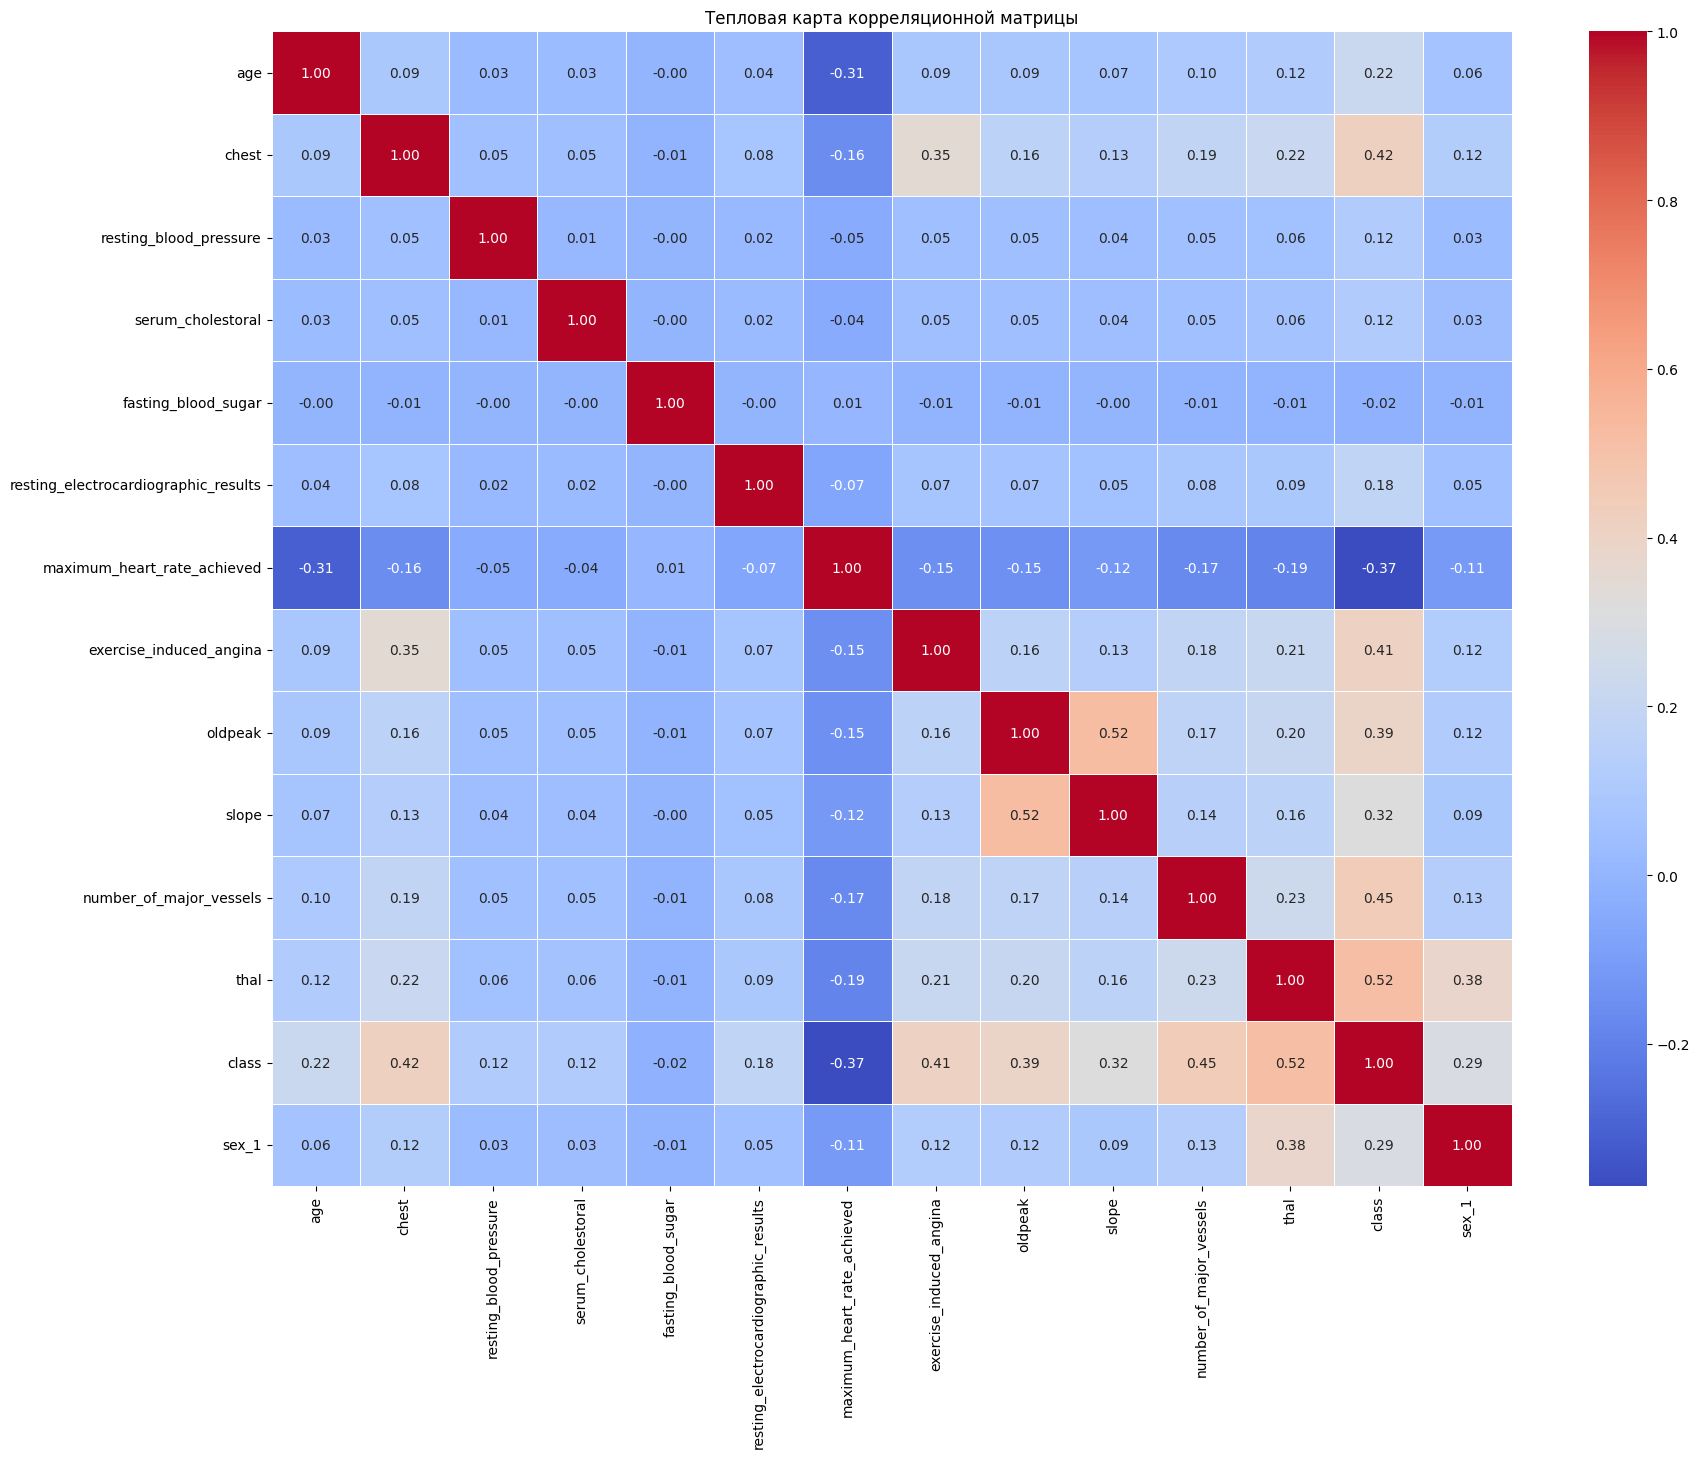

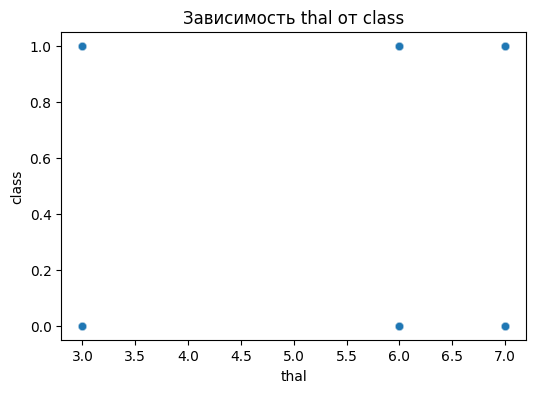

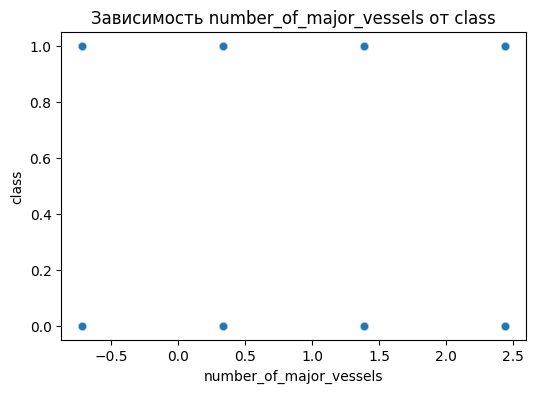

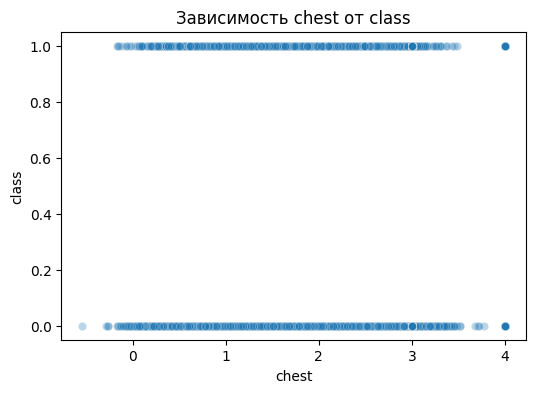

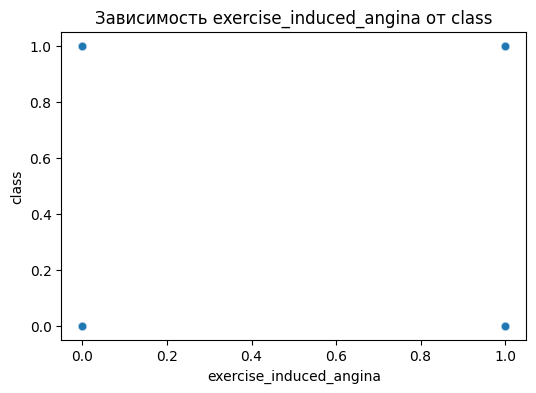

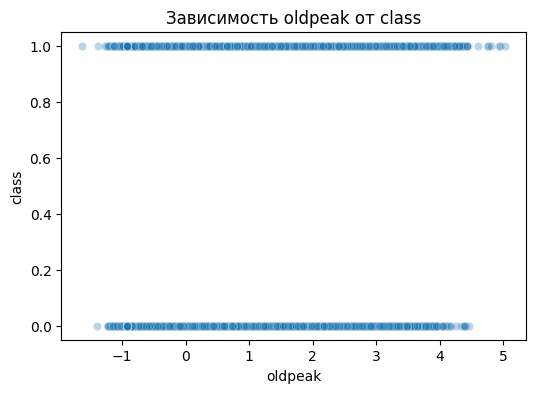

In [16]:
corr_matrix = train.corr()

# Тепловая карта корреляционной матрицы
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта корреляционной матрицы')
plt.show()

# Выбор топ 5 признаков по корреляции с целевой переменной 'class'
top_corr_features = corr_matrix['class'].abs().sort_values(ascending=False).index[1:6]

# Диаграммы рассеяния для наиболее коррелированных признаков
for feature in top_corr_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train[feature], y=train['class'], alpha=0.3)
    plt.title(f'Зависимость {feature} от class')
    plt.xlabel(feature)
    plt.ylabel('class')
    plt.show()

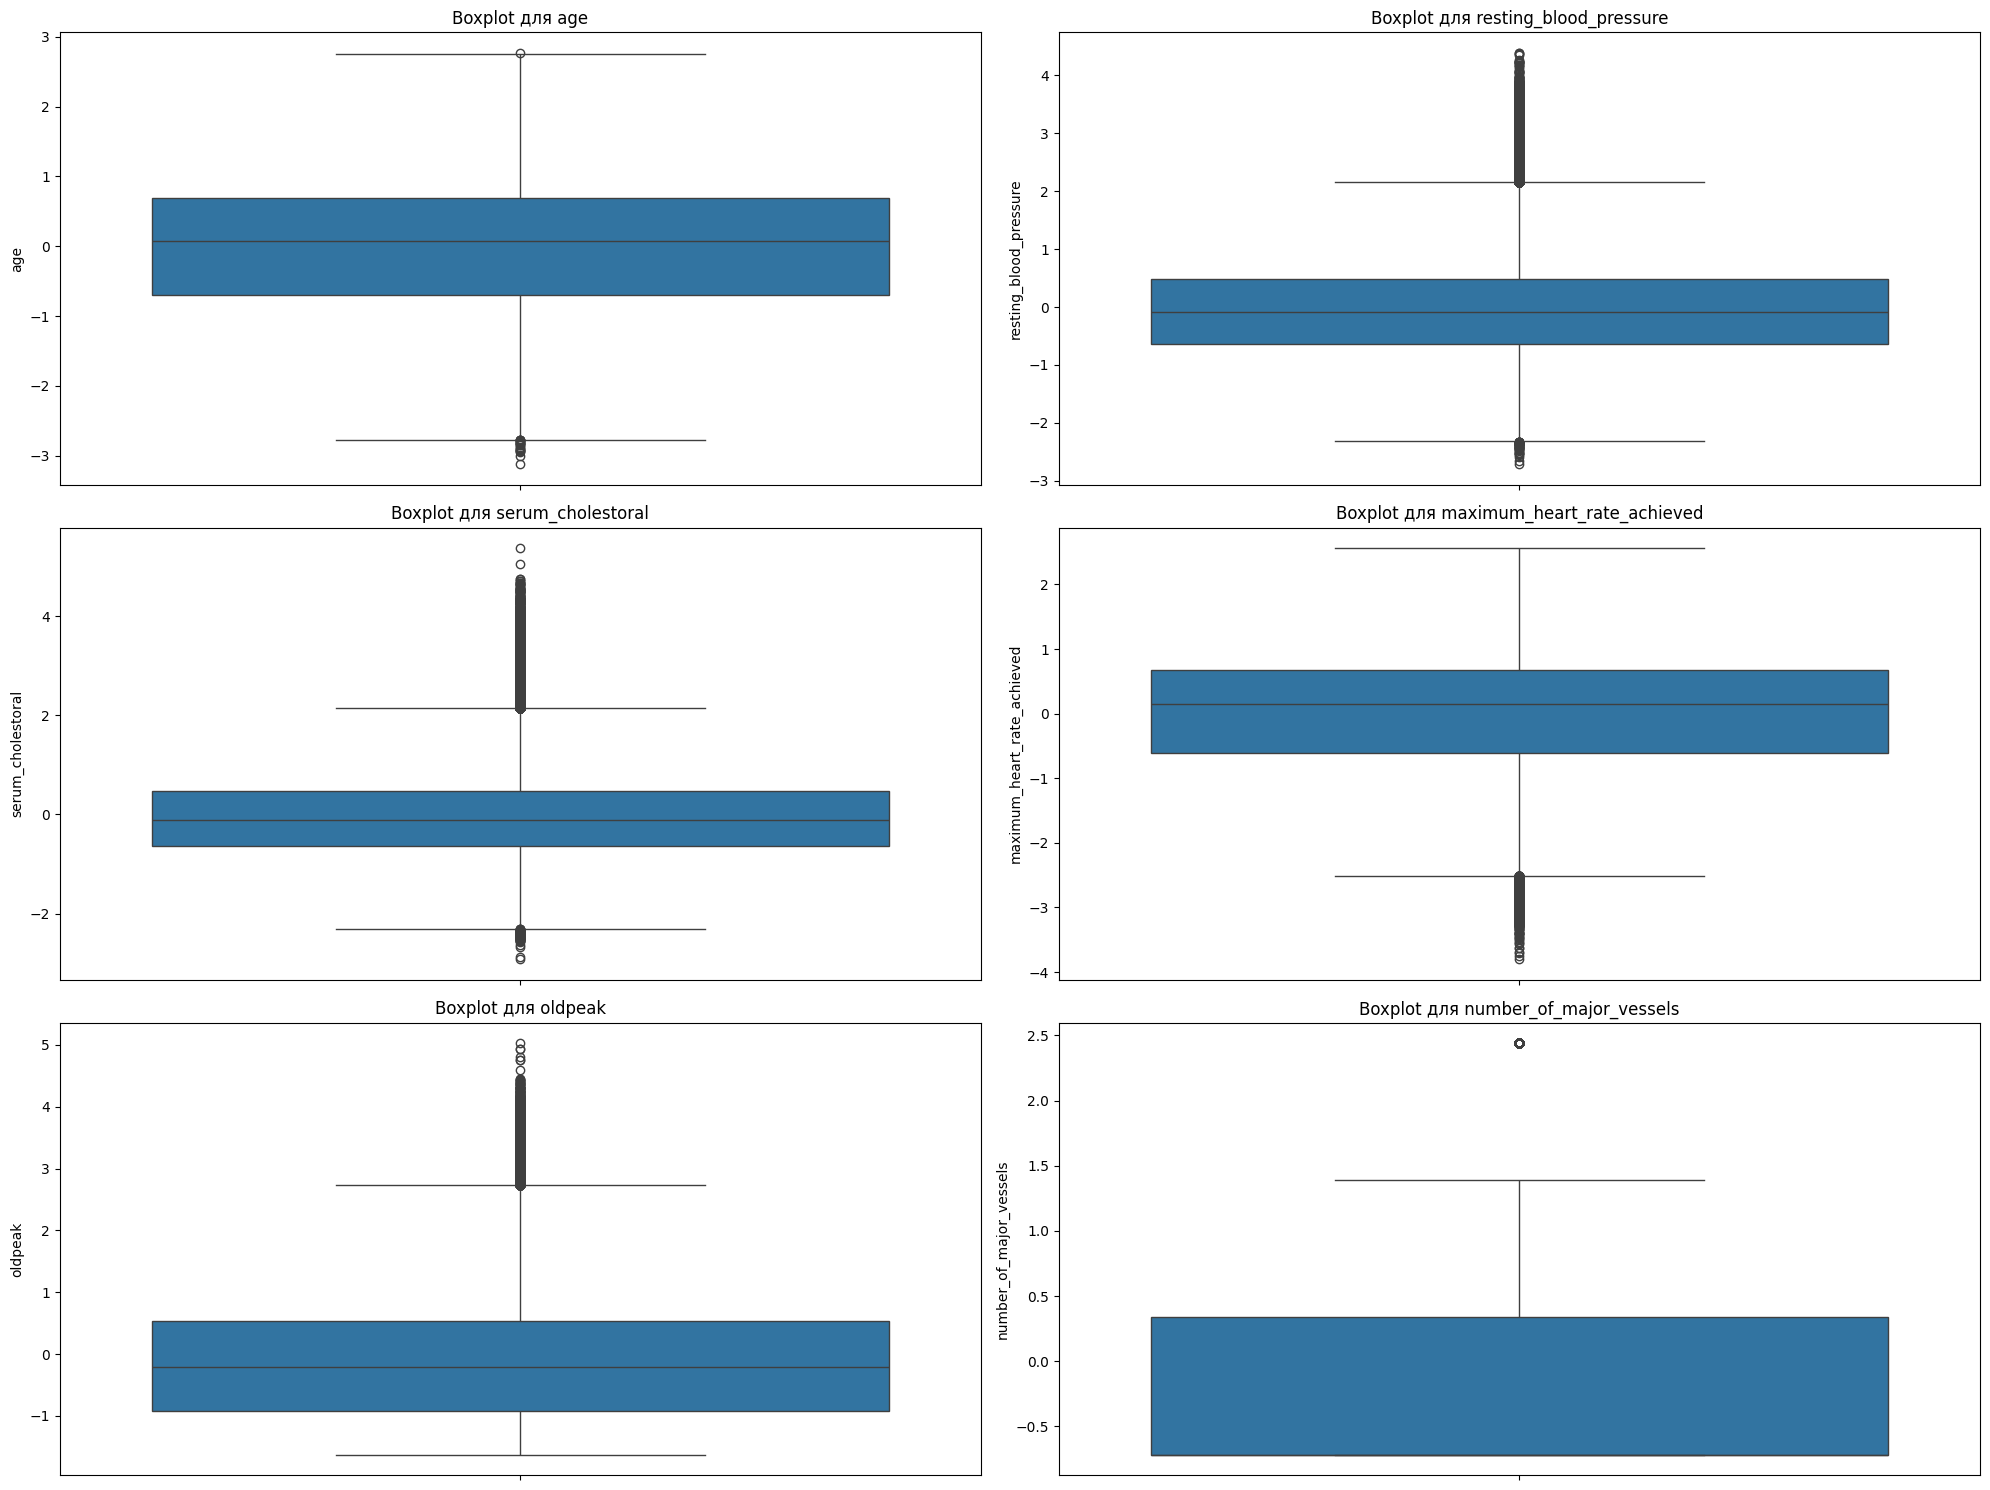

In [17]:
# Ящики с усами (boxplot) для числовых признаков
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=train[feature])
    plt.title(f'Boxplot для {feature}')
plt.tight_layout()
plt.show()

Выводы

oldpeak: Значения в диапазоне от -1 до 5, нет выраженных выбросов.

exercise_induced_angina: Бинарный признак (0 или 1), распределение без аномалий.

chest: Категориальный признак (0-4), выбросы отсутствуют.

number_of_major_vessels: Есть выбросы (значения около -0.5), нужно корректировать.

thal: Категориальный признак (3-7), выбросы отсутствуют, данные релевантны.

Boxplots (ящики с усами)

age: Незначительные выбросы внизу, можно оставить.

serum_cholestoral: Много выбросов на верхнем конце, но они релевантны.

resting_blood_pressure: Несколько выбросов на высоком уровне, стоит учитывать их.

maximum_heart_rate_achieved: Есть выбросы, которые могут быть важными.

oldpeak: Выбросы на высоком уровне, возможно релевантны.

number_of_major_vessels: Есть некорректные значения, их нужно удалить.

Выбор стратегии работы с выбросами:

Не трогать выбросы, так как исключение выбросов может привести к потере информации, важной для построения качественной модели.

**Разделение данных на обучающую и тестовую выборки**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('class', axis=1),
    train['class'],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=train['class'])

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480000, 13), (120000, 13), (480000,), (120000,))

In [20]:
#масштабирование
def scaling(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [21]:
X_train_scaled, X_test_scaled = scaling(X_train, X_test)

**Обучение моделей**

In [22]:
# Логистическая регрессия
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [23]:
# Случайный лес
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Глубокая нейронная сеть с ранней остановкой
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42, early_stopping=True)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [25]:
# Разделение тренировочных данных на обучение и валидацию
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Логистическая регрессия
log_model.fit(X_train_split, y_train_split)
y_val_pred_log = log_model.predict(X_val_split)
print("Logistic Regression:\n", classification_report(y_val_split, y_val_pred_log))

# Случайный лес
rf_model.fit(X_train_split, y_train_split)
y_val_pred_rf = rf_model.predict(X_val_split)
print("Random Forest:\n", classification_report(y_val_split, y_val_pred_rf))

# Глубокая нейронная сеть
mlp_model.fit(X_train_split, y_train_split)
y_val_pred_mlp = mlp_model.predict(X_val_split)
print("Neural Network:\n", classification_report(y_val_split, y_val_pred_mlp))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     53266
           1       0.87      0.86      0.86     42734

    accuracy                           0.88     96000
   macro avg       0.88      0.88      0.88     96000
weighted avg       0.88      0.88      0.88     96000

Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91     53266
           1       0.89      0.88      0.88     42734

    accuracy                           0.90     96000
   macro avg       0.90      0.90      0.90     96000
weighted avg       0.90      0.90      0.90     96000

Neural Network:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     53266
           1       0.89      0.88      0.89     42734

    accuracy                           0.90     96000
   macro avg       0.90      0.90      0.90     96000
weighted avg       

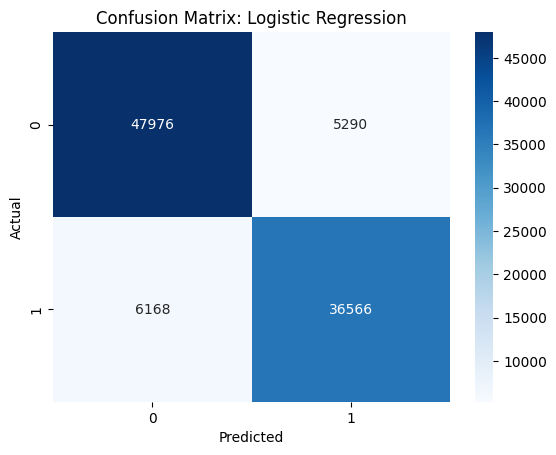

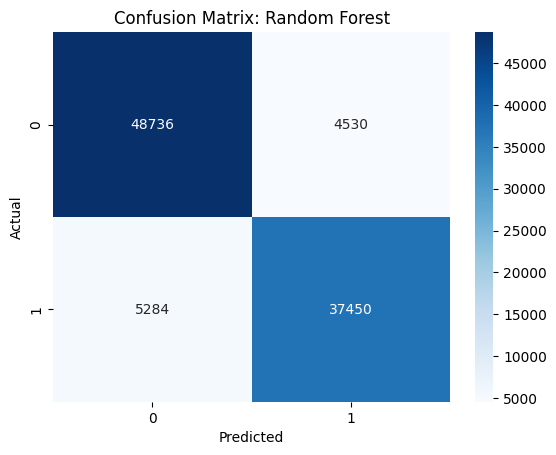

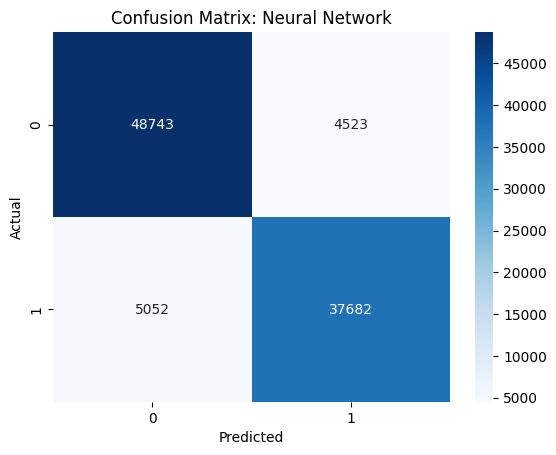

In [26]:
# Матрицы ошибок
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion(y_val_split, y_val_pred_log, 'Logistic Regression')
plot_confusion(y_val_split, y_val_pred_rf, 'Random Forest')
plot_confusion(y_val_split, y_val_pred_mlp, 'Neural Network')

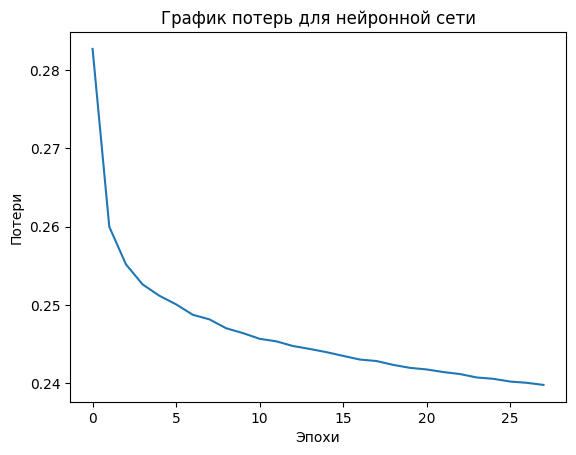

In [27]:
# Графики обучения (AUC и потери для нейронной сети)
train_loss = mlp_model.loss_curve_
plt.plot(train_loss)
plt.title('График потерь для нейронной сети')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.show()

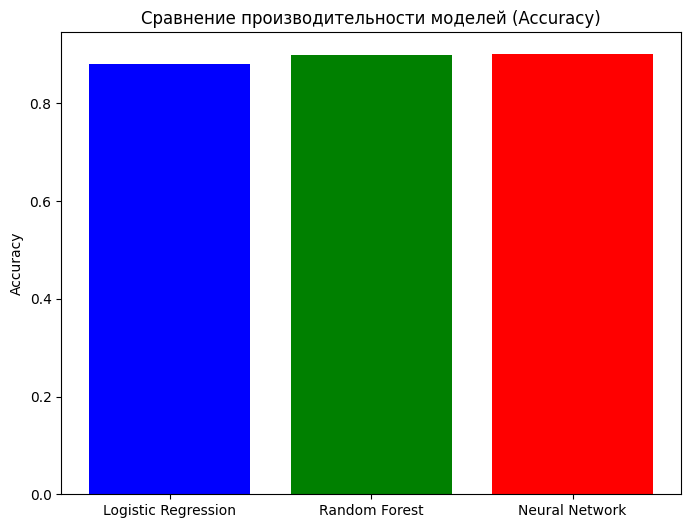

In [28]:
# Сравнение производительности моделей
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [accuracy_score(y_val_split, y_val_pred_log), accuracy_score(y_val_split, y_val_pred_rf), accuracy_score(y_val_split, y_val_pred_mlp)]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Сравнение производительности моделей (Accuracy)')
plt.ylabel('Accuracy')
plt.show()

In [29]:
# Экспорт лучшей модели
best_model = rf_model if max(accuracies) == accuracy_score(y_val_split, y_val_pred_rf) else mlp_model
joblib.dump(best_model, 'best_model.pkl')  # Экспорт лучшей модели в файл

['best_model.pkl']